# Khai báo thư viện

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing

# Data

In [52]:
df = pd.read_excel("D:\_Dev\_Group Project\Affinity-Propagation-ML-UEH\Data\City\city.xlsx")

In [53]:
print(f'{df.shape[0]} bản ghi')
print(f'{df.shape[1]} trường dữ liệu')

1000 bản ghi
9 trường dữ liệu


In [54]:
df.head()

,City_ID,Population,Average_Income,Average_Age,Employment_Rate,GPI,Elevation,Average_Temperature,Rainfall
0,1,6473388,51240,54,68.187646,0.914301,1204,36.584899,914.261612
1,2,6600634,42148,27,84.352199,3.195701,2665,21.018563,2350.053818
2,3,4354572,99270,35,65.258193,3.306420,2758,30.187762,2305.024845
3,4,2284489,9757,61,42.857612,3.418272,1409,-5.813753,1847.423930
4,5,9574682,24097,55,83.245301,1.703309,1641,9.296976,795.460002


| Tên cột              | Mô tả                                |
|----------------------|-----------------------------------------------|
| City_ID              | Mã định danh duy nhất cho mỗi thành phố       |
| Population           | Dân số của thành phố                          |
| Average_Income       | Thu nhập trung bình của người dân             |
| Average_Age          | Tuổi trung bình của dân cư                    |
| Employment_Rate      | Tỷ lệ người có việc làm (% dân số lao động)  |
| GPI                  | Chỉ số hiệu suất tổng thể của thành phố       |
| Elevation            | Độ cao trung bình so với mực nước biển |
| Average_Temperature  | Nhiệt độ trung bình năm                  |
| Rainfall             | Lượng mưa trung bình năm (mm hoặc cm)         |


In [55]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [56]:
df.head()

,city_id,population,average_income,average_age,employment_rate,gpi,elevation,average_temperature,rainfall
0,1,6473388,51240,54,68.187646,0.914301,1204,36.584899,914.261612
1,2,6600634,42148,27,84.352199,3.195701,2665,21.018563,2350.053818
2,3,4354572,99270,35,65.258193,3.306420,2758,30.187762,2305.024845
3,4,2284489,9757,61,42.857612,3.418272,1409,-5.813753,1847.423930
4,5,9574682,24097,55,83.245301,1.703309,1641,9.296976,795.460002


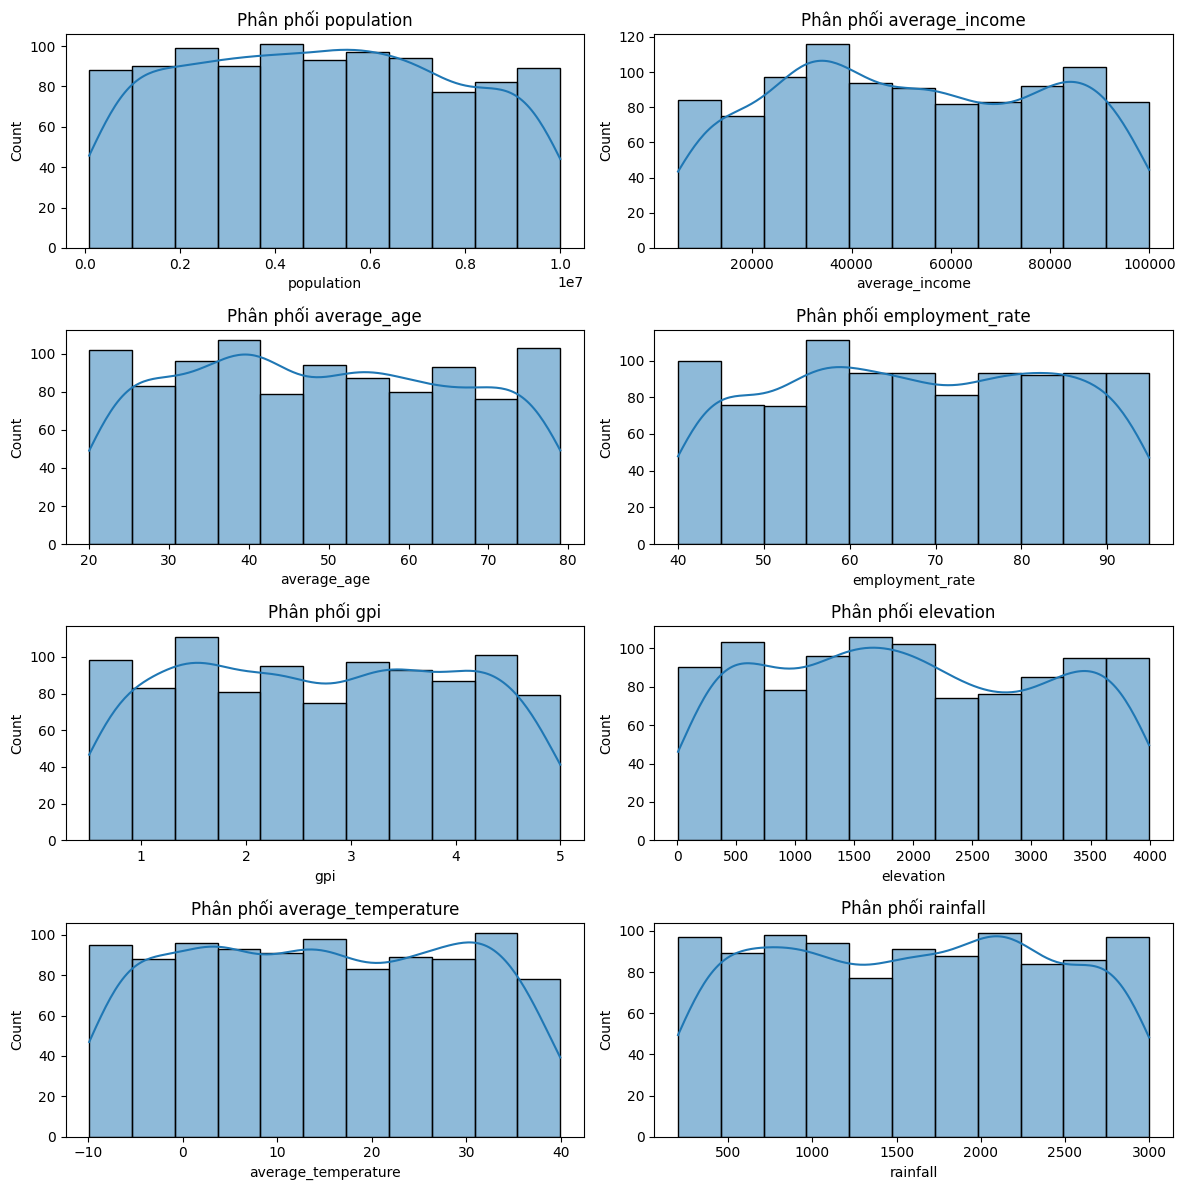

In [57]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 12))
axes = axes.flatten() 

for i, col in enumerate(df.columns[1:]):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Phân phối {col}')

plt.tight_layout()
plt.show()

# Tiền xử lý

In [58]:
df.info() # Toàn dữ liệu số

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   city_id              1000 non-null   int64  
 1   population           1000 non-null   int64  
 2   average_income       1000 non-null   int64  
 3   average_age          1000 non-null   int64  
 4   employment_rate      1000 non-null   float64
 5   gpi                  1000 non-null   float64
 6   elevation            1000 non-null   int64  
 7   average_temperature  1000 non-null   float64
 8   rainfall             1000 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 70.4 KB


In [59]:
df.isnull().sum() # không có giá trị thiếu

city_id                0
population             0
average_income         0
average_age            0
employment_rate        0
gpi                    0
elevation              0
average_temperature    0
rainfall               0
dtype: int64

## Phát hiện ngoại lai

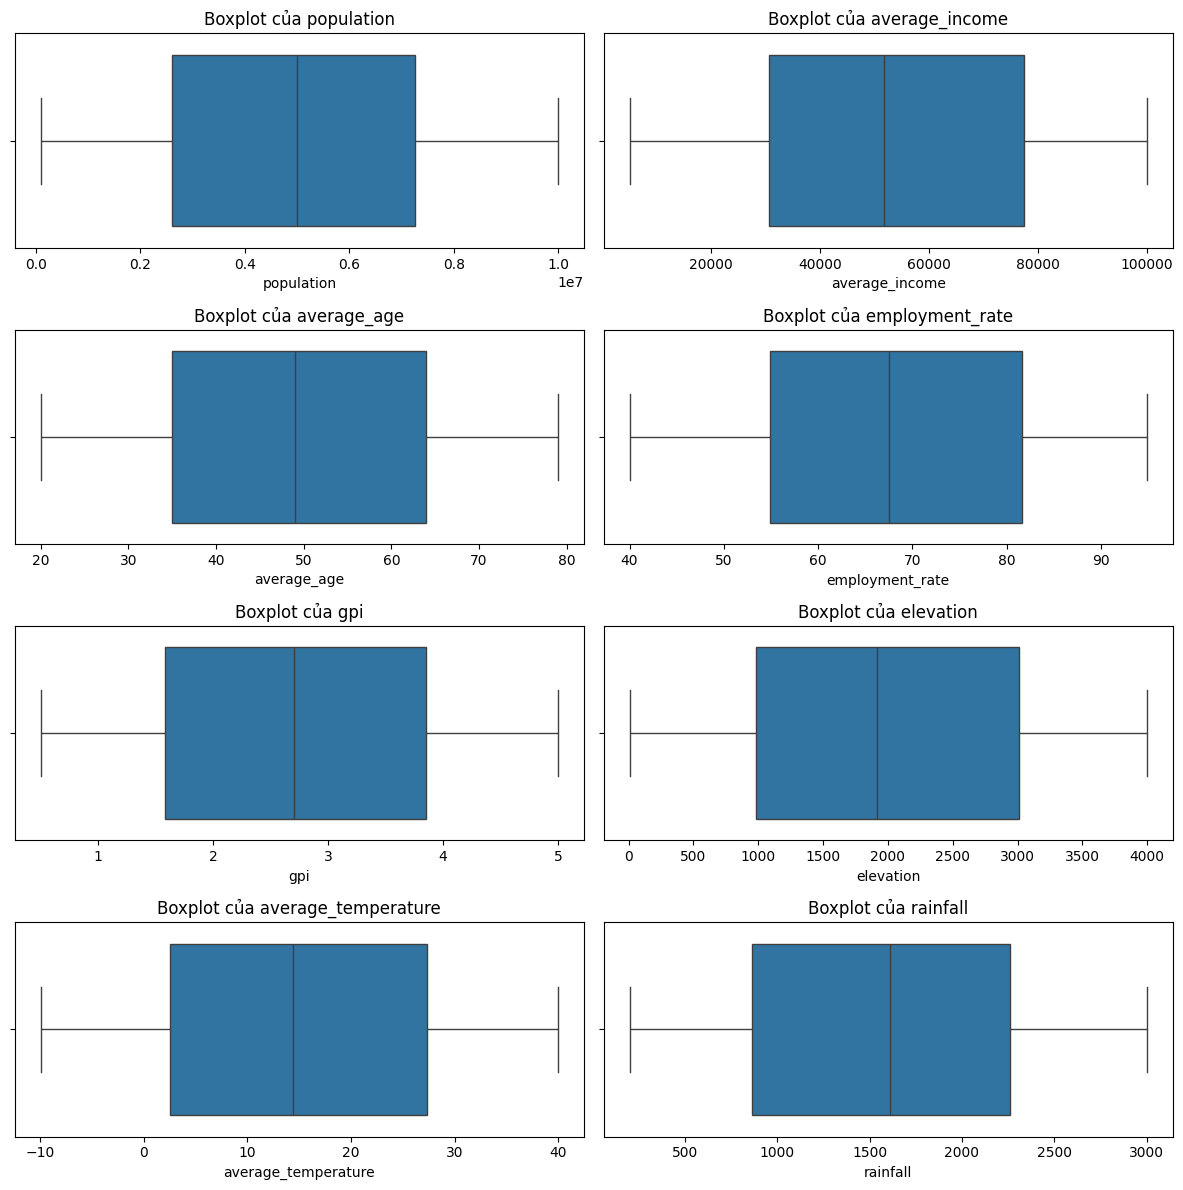

In [60]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 12))
axes = axes.flatten()

for i, col in enumerate(df.columns[1:]):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot của {col}')

plt.tight_layout()
plt.show()

## Chuẩn hoá

Toàn bộ đều là dữ liệu số => Xử lí bằng StandardScaler

In [61]:
cols = df.columns[1:].tolist()
scaler = preprocessing.StandardScaler()
df[cols] = scaler.fit_transform(df[cols])

In [62]:
# Sau tiền xử lý
df.head()

,city_id,population,average_income,average_age,employment_rate,gpi,elevation,average_temperature,rainfall
0,1,0.536164,-0.046264,0.283343,0.037027,-1.398482,-0.667363,1.527612,-0.828853
1,2,0.581323,-0.381075,-1.282086,1.052626,0.364974,0.588905,0.440444,0.921748
2,3,-0.215797,1.722431,-0.818255,-0.147027,0.450556,0.668873,1.080830,0.866846
3,4,-0.950463,-1.573867,0.689194,-1.554428,0.537015,-0.491090,-1.433551,0.308912
4,5,1.636804,-1.045800,0.341321,0.983081,-0.788602,-0.291600,-0.378203,-0.973703


# Lưu

In [64]:
df.to_csv("D:\_Dev\_Group Project\Affinity-Propagation-ML-UEH\Data\City\city_preprocessed.csv",index=False)